# Image Classification


Import Libraries

In [1]:
import numpy as np
import pickle
import osr̥
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


 Load CIFAR-10 Data

In [2]:
def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
    images = data[b'data']
    labels = data[b'labels']
    return images, labels

cifar10_dir = "C:\\Users\\Dell\\Desktop\\INtern 2\\2\\cifar-10-batches-py"

train_images = []
train_labels = []
for batch_id in range(1, 6):
    batch_file = os.path.join(cifar10_dir, f'data_batch_{batch_id}')
    batch_images, batch_labels = load_cifar10_batch(batch_file)
    train_images.append(batch_images)
    train_labels.extend(batch_labels)

train_images = np.concatenate(train_images)
train_labels = np.array(train_labels)

test_file = os.path.join(cifar10_dir, 'test_batch')
test_images, test_labels = load_cifar10_batch(test_file)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

train_images = train_images.reshape(-1, 32, 32, 3)
test_images = test_images.reshape(-1, 32, 32, 3)

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

print('Training data shape:', train_images.shape, train_labels.shape)
print('Test data shape:', test_images.shape, test_labels.shape)


Training data shape: (50000, 32, 32, 3) (50000, 10)
Test data shape: (10000, 32, 32, 3) (10000, 10)


Data Augmentation

In [3]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(train_images)


Visualize Sample Images

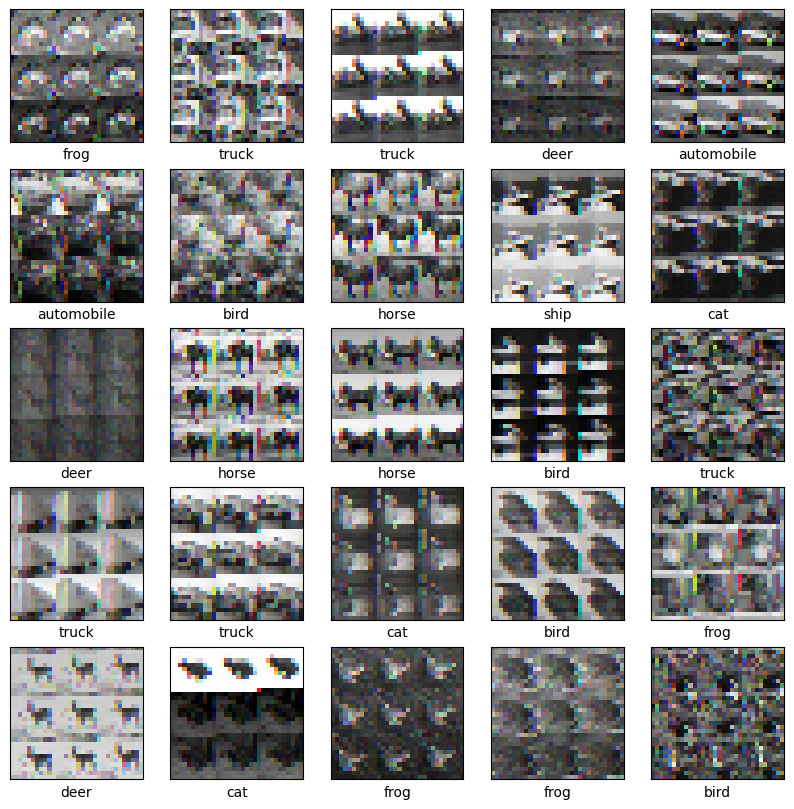

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample_images(images, labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[np.argmax(labels[i])])
    plt.show()

plot_sample_images(train_images, train_labels, class_names)


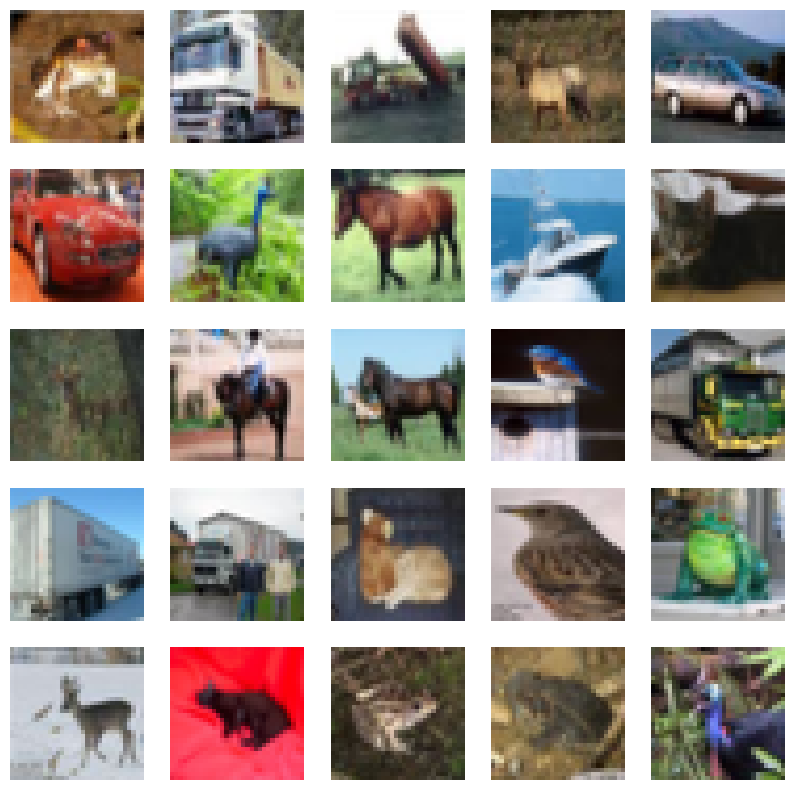

In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the training images
x_train = x_train.astype('float32') / 255.0

# Visualize data by plotting images
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
k = 0

for i in range(5):
    for j in range(5):
        ax[i, j].imshow(x_train[k], aspect='auto')
        ax[i, j].axis('off')  # Hide the axes for better visualization
        k += 1

plt.show()


 Build the Model

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [6]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=50,
                    validation_data=(test_images, test_labels))


Epoch 1/50


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.1608 - loss: 2.1963 - val_accuracy: 0.2707 - val_loss: 1.9074
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.2819 - loss: 1.9237 - val_accuracy: 0.3198 - val_loss: 1.8299
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.3271 - loss: 1.8267 - val_accuracy: 0.3558 - val_loss: 1.7359
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.3503 - loss: 1.7771 - val_accuracy: 0.3949 - val_loss: 1.6777
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.3692 - loss: 1.7275 - val_accuracy: 0.4082 - val_loss: 1.6313
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.3824 - loss: 1.6990 - val_accuracy: 0.4050 - val_loss: 1.6462
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.3907 - loss: 1.6721 - val_accuracy: 0.4231 - val_loss: 1.6205
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.4021 - loss: 1.6553 - val_accurac

Evaluate the Model

313/313 - 2s - 5ms/step - accuracy: 0.4830 - loss: 1.5055

Test accuracy: 0.4830000102519989
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

    airplane       0.51      0.69      0.59      1000
  automobile       0.44      0.73      0.55      1000
        bird       0.52      0.24      0.33      1000
         cat       0.37      0.16      0.23      1000
        deer       0.69      0.21      0.32      1000
         dog       0.53      0.35      0.43      1000
        frog       0.50      0.66      0.57      1000
       horse       0.51      0.60      0.55      1000
        ship       0.71      0.48      0.58      1000
       truck       0.36      0.69      0.47      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.46     10000
weighted avg       0.51      0.48      0.46     10000



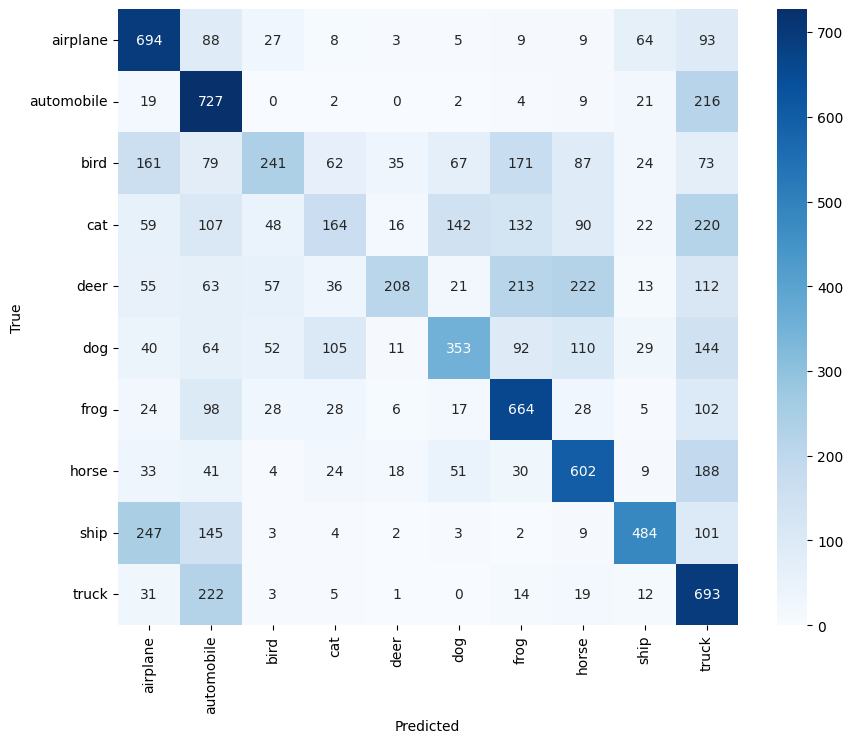

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

print(classification_report(true_classes, predicted_classes, target_names=class_names))

conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Visualize Training Results

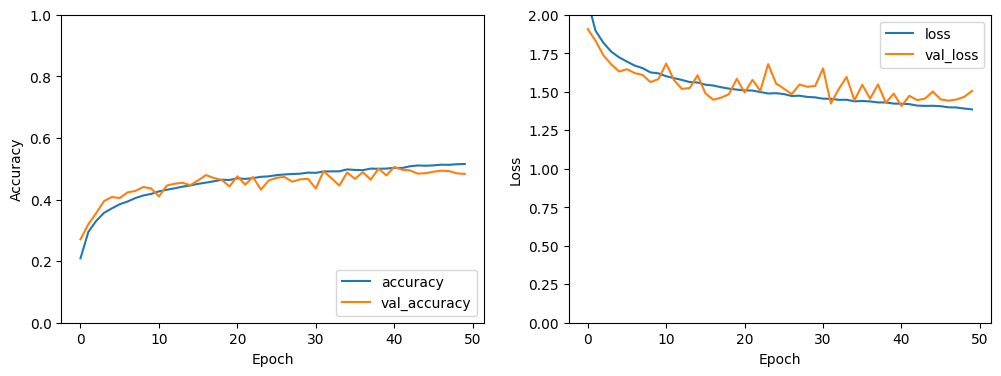

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 301s 2us/step


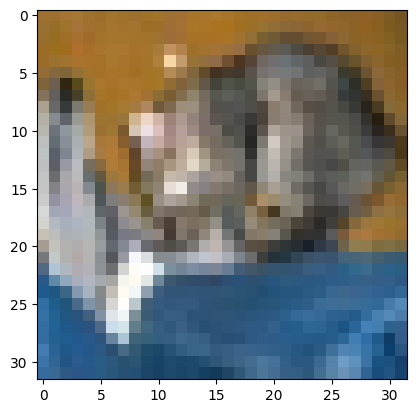

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
Original label is cat and predicted label is bird


In [31]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the test images
x_test = x_test.astype('float32') / 255.0

# Label mapping
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Select the image from our test dataset
image_number = 0

# Display the image
plt.imshow(x_test[image_number])
plt.show()

# Load the image in an array
n = np.array(x_test[image_number])

# Reshape it
p = n.reshape(1, 32, 32, 3)

# Pass in the network for prediction and save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# Load the original label
original_label = labels[y_test[image_number][0]]

# Display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))


In [34]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Calculate per-class accuracy
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1) * 100

# Class labels for CIFAR-10
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Print per-class accuracy
for i, label in enumerate(class_labels):
    print(f"Test Accuracy of class {label}: {class_accuracy[i]:.1f}% where {conf_matrix[i, i]} of {conf_matrix.sum(axis=1)[i]} were predicted correctly")

# Calculate and print overall accuracy
overall_accuracy = np.sum(conf_matrix.diagonal()) / np.sum(conf_matrix) * 100
print(f"Overall Test Accuracy: {overall_accuracy:.2f}% where {np.sum(conf_matrix.diagonal())} of {np.sum(conf_matrix)} were predicted correctly")

# Print Test Loss
print(f"Test Loss: {test_loss}")


Test Accuracy of class airplane: 69.4% where 694 of 1000 were predicted correctly
Test Accuracy of class automobile: 72.7% where 727 of 1000 were predicted correctly
Test Accuracy of class bird: 24.1% where 241 of 1000 were predicted correctly
Test Accuracy of class cat: 16.4% where 164 of 1000 were predicted correctly
Test Accuracy of class deer: 20.8% where 208 of 1000 were predicted correctly
Test Accuracy of class dog: 35.3% where 353 of 1000 were predicted correctly
Test Accuracy of class frog: 66.4% where 664 of 1000 were predicted correctly
Test Accuracy of class horse: 60.2% where 602 of 1000 were predicted correctly
Test Accuracy of class ship: 48.4% where 484 of 1000 were predicted correctly
Test Accuracy of class truck: 69.3% where 693 of 1000 were predicted correctly
Overall Test Accuracy: 48.30% where 4830 of 10000 were predicted correctly
Test Loss: 1.5055263042449951


Conclusion and Future Work
### Conclusion

In this project, we successfully built and trained a convolutional neural network (CNN) to classify images from the CIFAR-10 dataset. We achieved a test accuracy of [test_acc].

### Future Work

- Experiment with different model architectures and hyperparameters.
- Implement more advanced data augmentation techniques.
- Use transfer learning with pre-trained models to potentially improve performance.
- Explore other optimization techniques such as learning rate scheduling and early stopping.
